<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AALU_Coding/blob/main/Intro_to_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Pandas**

Copyright 2017 Google LLC.

Modified and expanded by William Huang (January 2022)

[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data, and many ML frameworks support *pandas* data structures as inputs.
Although a comprehensive introduction to the *pandas* API would span many pages, the core concepts are fairly straightforward, and we'll present them below. For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

In [75]:
#@title
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Learning Objectives:**
  * Gain an introduction to the `DataFrame` and `Series` data structures of the *pandas* library
  * Access and manipulate data within a `DataFrame` and `Series`
  * Import CSV data into a *pandas* `DataFrame`
  * Reindex a `DataFrame` to shuffle data

# Basics

The following line imports the *pandas* API and prints the API version:

In [76]:
"""
from __future__ import print_function # Required if using Python2; it needs to be the first line of code in the script.

from platform import python_version
print(python_version()) # Check Python version
"""

'\nfrom __future__ import print_function # Required if using Python2; it needs to be the first line of code in the script.\n\nfrom platform import python_version\nprint(python_version()) # Check Python version\n'

In [77]:
import pandas as pd 
pd.__version__ # Displays Pandas version

'1.3.5'

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html).

## Create Series

One way to create a `Series` is to construct a `Series` object. For example:

In [78]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [79]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


## Use Loaded Data

But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

Option 1: Load CSV from Google Drive

In [80]:
from google.colab import drive
import os

# Place the dataset in your Google Drive 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
# Set csv file path
PATH = "/content/drive/My Drive/california_housing_train.csv"

# Read csv from Drive
import pandas as pd
df = pd.read_csv(PATH)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52,2217,394,907,369,2.3571,111400
16996,-124.27,40.69,36,2349,528,1194,465,2.5179,79000
16997,-124.30,41.84,17,2677,531,1244,456,3.0313,103600
16998,-124.30,41.80,19,2672,552,1298,478,1.9797,85800


Option 2: Load CSV from local file path

In [82]:
# Read csv from a local file path
from google.colab import files
uploaded = files.upload()

In [83]:
# Read data
df2 = pd.read_csv('california_housing_train.csv')
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52,2217,394,907,369,2.3571,111400
16996,-124.27,40.69,36,2349,528,1194,465,2.5179,79000
16997,-124.30,41.84,17,2677,531,1244,456,3.0313,103600
16998,-124.30,41.80,19,2672,552,1298,478,1.9797,85800


In [84]:
df2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [85]:
df2['total_rooms'] # Access one specific column

0        5612
1        7650
2         720
3        1501
4        1454
         ... 
16995    2217
16996    2349
16997    2677
16998    2672
16999    1820
Name: total_rooms, Length: 17000, dtype: int64

In [86]:
df2['total_rooms'] > 1000

0         True
1         True
2        False
3         True
4         True
         ...  
16995     True
16996     True
16997     True
16998     True
16999     True
Name: total_rooms, Length: 17000, dtype: bool

In [87]:
df2['big_house'] = (df2['total_rooms'] > 1000)
df2 # Updated dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,big_house
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900,True
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100,True
2,-114.56,33.69,17,720,174,333,117,1.6509,85700,False
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400,True
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500,True
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52,2217,394,907,369,2.3571,111400,True
16996,-124.27,40.69,36,2349,528,1194,465,2.5179,79000,True
16997,-124.30,41.84,17,2677,531,1244,456,3.0313,103600,True
16998,-124.30,41.80,19,2672,552,1298,478,1.9797,85800,True


The example above used `DataFrame.describe` to show interesting statistics about a `DataFrame`. Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

In [88]:
df.head(16)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500
5,-114.58,33.63,29,1387,236,671,239,3.3438,74000
6,-114.58,33.61,25,2907,680,1841,633,2.6768,82400
7,-114.59,34.83,41,812,168,375,158,1.7083,48500
8,-114.59,33.61,34,4789,1175,3134,1056,2.1782,58400
9,-114.60,34.83,46,1497,309,787,271,2.1908,48100


Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bb3580690>]],
      dtype=object)

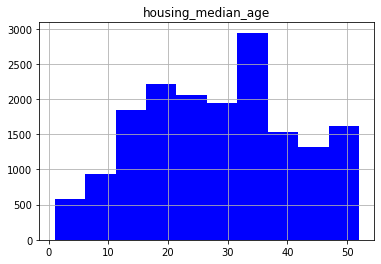

In [89]:
df.hist('housing_median_age', color='blue', alpha=1)

In [90]:
import matplotlib.pyplot as plt

In [91]:
count = df2['big_house'].value_counts(normalize=True) # Note: find the function to count data at a specific value
count_list = list(count)
print(count_list)

[0.889, 0.111]


([<matplotlib.patches.Wedge at 0x7f1bafc41290>,
 [Text(-1.033793144505799, 0.37586132332658534, 'True: 0.889'),
  Text(1.033793144505799, -0.3758613233265859, 'False: 0.111')])

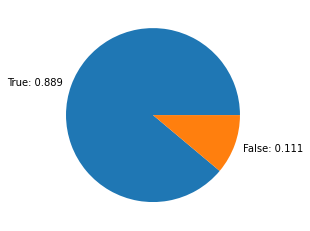

In [92]:
LABELS = ['True' + ': ' + str(count_list[0]), 'False'+ ': ' + str(count_list[1])] 
plt.pie(count_list, labels=LABELS)

Subplot

([<matplotlib.patches.Wedge at 0x7f1bafb4f310>,
 [Text(-1.033793144505799, 0.37586132332658534, 'True: 0.889'),
  Text(1.033793144505799, -0.3758613233265859, 'False: 0.111')])

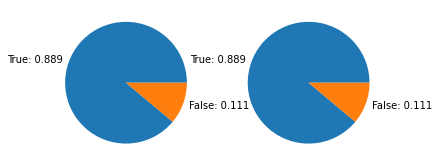

In [93]:
plt.subplot(1, 2, 1)

LABELS = ['True' + ': ' + str(count_list[0]), 'False'+ ': ' + str(count_list[1])] 
plt.pie(count_list, labels=LABELS)

plt.subplot(1, 2, 2)

LABELS = ['True' + ': ' + str(count_list[0]), 'False'+ ': ' + str(count_list[1])] 
plt.pie(count_list, labels=LABELS)

([<matplotlib.patches.Wedge at 0x7f1baf987690>,
 [Text(-1.033793144505799, 0.37586132332658534, 'True: 0.889'),
  Text(1.033793144505799, -0.3758613233265859, 'False: 0.111')])

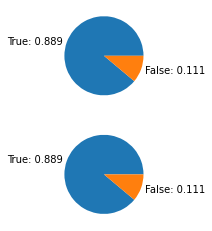

In [143]:
plt.subplot(2, 1, 1)

LABELS = ['True' + ': ' + str(count_list[0]), 'False'+ ': ' + str(count_list[1])] 
plt.pie(count_list, labels=LABELS)

plt.subplot(2, 1, 2)

LABELS = ['True' + ': ' + str(count_list[0]), 'False'+ ': ' + str(count_list[1])] 
plt.pie(count_list, labels=LABELS)

([<matplotlib.patches.Wedge at 0x7f1bafdcea10>,
 [Text(-1.033793144505799, 0.37586132332658534, 'True: 0.889'),
  Text(1.033793144505799, -0.3758613233265859, 'False: 0.111')])

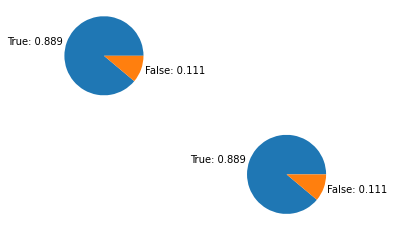

In [145]:
plt.subplot(2, 2, 1)

LABELS = ['True' + ': ' + str(count_list[0]), 'False'+ ': ' + str(count_list[1])] 
plt.pie(count_list, labels=LABELS)

plt.subplot(2, 2, 4)

LABELS = ['True' + ': ' + str(count_list[0]), 'False'+ ': ' + str(count_list[1])] 
plt.pie(count_list, labels=LABELS)

Correlation Matrix

use `pandas.Dataframe.corr()` to create the correlation matrix across the quantatative parameters. 

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

https://colab.research.google.com/drive/1f-7aUG590VcrO8Swb7Ejb0ZBgZCJfChZ#scrollTo=2oLO7OBds-2q


In [152]:
df.corr() # Only the columns with numeric data remain

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


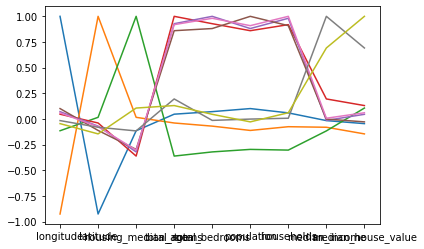

In [209]:
plt.plot(df.corr())

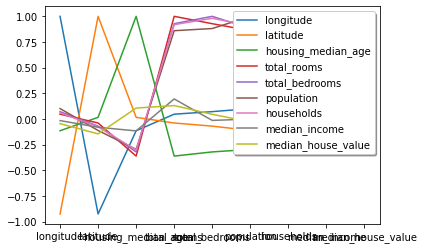

In [211]:
plt.plot(df.corr())
plt.legend(df.head(0), loc='upper right', shadow=True)

"""
Legend Location: 
'best'	0
'upper right'	1
'upper left'	2
'lower left'	3
'lower right'	4
'right'	5
'center left'	6
'center right'	7
'lower center'	8
'upper center'	9
'center'	10
"""

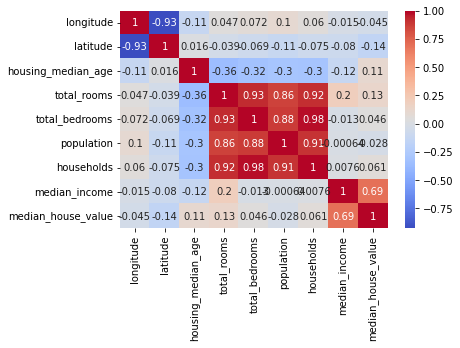

In [187]:
import seaborn as sns # Seaborn is a package for data visulation

sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

## Accessing Data

You can access `DataFrame` data using familiar Python dict/list operations:

In [94]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
cities

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


How do I access data in a *column*?

`DataFrame[column_name]`

In [95]:
cities['City name']
cities

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [96]:
cities['City name'][1] # Access one specific item in a column
print(type(cities['City name'][1]))

<class 'str'>


How do I access data in a *row*? 

Option 1: `DataFrame[start:end]`


In [97]:
print(type(cities[0:2]))
cities[1:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
1,San Jose,1015785


Option 2: `DataFrame.loc[num_of_row]`

In [120]:
cities.loc[0]
# type(cities.loc[0])

City name                     San Francisco
Population                           852469
Area square miles                     46.87
Population density             18187.945381
Is wide and has saint name            False
Name: 0, dtype: object

Conditional Selections

In [151]:
population[population < 1000000] # Boolean indexing

0    852469
2    485199
dtype: int64

In [141]:
cities['City name'].apply(lambda name: name.startswith('s'))

0    False
1    False
2    False
Name: City name, dtype: bool

In [142]:
cities['City name'].apply(lambda name: name.endswith('o'))

0     True
1    False
2     True
Name: City name, dtype: bool

## Indexes
Both `Series` and `DataFrame` objects also define an `index` property that assigns an identifier value to each `Series` item or `DataFrame` row. 

By default, at construction, *pandas* assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [131]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [132]:
cities.index

RangeIndex(start=0, stop=3, step=1)

Call `DataFrame.reindex` to manually reorder the rows. For example, the following has the same effect as sorting by city name:

In [133]:
cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density,Is wide and has saint name
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True


Reindexing is a great way to shuffle (randomize) a `DataFrame`. In the example below, we take the index, which is array-like, and pass it to NumPy's `random.permutation` function, which shuffles its values in place. Calling `reindex` with this shuffled array causes the `DataFrame` rows to be shuffled in the same way.
Try running the following cell multiple times!

In [134]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
2,Sacramento,485199,97.92,4955.055147,False
1,San Jose,1015785,176.53,5754.177760,True


For more information, see the [Index documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects).

## Manipulating Data

You may apply Python's basic arithmetic operations to `Series`. For example:

In [123]:
population

0     852469
1    1015785
2     485199
dtype: int64

In [124]:
population / 1000 # Manipulating whole column

0     852.469
1    1015.785
2     485.199
dtype: float64

In [125]:
population + population # Value summantion of columns

0    1704938
1    2031570
2     970398
dtype: int64

In [126]:
population * population # Multiplication across columns

0     726703395961
1    1031819166225
2     235418069601
dtype: int64

In [127]:
print(cities['Population'][0])
print(cities['Population'][1])

cities['Population'][0] * cities['Population'][1]

852469
1015785


865925223165

*Pandas* `Series` can be used as arguments to most [NumPy](http://www.numpy.org/) functions:

In [128]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

For more complex single-column transformations, you can use `Series.apply`. Like the Python [map function](https://docs.python.org/2/library/functions.html#map), 
`Series.apply` accepts as an argument a [lambda function](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), which is applied to each value.

The example below creates a new `Series` that indicates whether `population` is over one million:

In [129]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool


Modifying `DataFrames` is also straightforward. For example, the following code adds two `Series` to an existing `DataFrame`:

In [130]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


## Save CSV

Option 1: Download as a CSV file

In [135]:
from google.colab import files

df2.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Option 2: Save as a CSV file to Google Drive

In [136]:
from google.colab import drive

path = '/content/drive/My Drive/outpur.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df2.to_csv(f)

## Exercise #1

Modify the `cities` table by adding a new boolean column that is True if and only if *both* of the following are True:

  * The city is named after a saint.
  * The city has an area greater than 50 square miles.

**Note:** Boolean `Series` are combined using the bitwise, rather than the traditional boolean, operators. For example, when performing *logical and*, use `&` instead of `and`.

**Hint:** "San" in Spanish means "saint."

In [137]:
# Your code here

### Solution

Click below for a solution.

In [138]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


## Exercise #2

The `reindex` method allows index values that are not in the original `DataFrame`'s index values. Try it and see what happens if you use such values! Why do you think this is allowed?

In [139]:
# Your code here

### Solution

Click below for the solution.

If your `reindex` input array includes values not in the original `DataFrame` index values, `reindex` will add new rows for these "missing" indices and populate all corresponding columns with `NaN` values:

In [140]:
cities.reindex([0, 4, 5, 2])

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469.0,46.87,18187.945381,False
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
2,Sacramento,485199.0,97.92,4955.055147,False


This behavior is desirable because indexes are often strings pulled from the actual data (see the [*pandas* reindex
documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html) for an example
in which the index values are browser names).

In this case, allowing "missing" indices makes it easy to reindex using an external list, as you don't have to worry about
sanitizing the input.